In [100]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import numpy as np

def visulize(df1,df2):
    # Remove the ".pdf" extension from filenames in df2
    df2['filename'] = df2['filename'].str.replace('.pdf', '', regex=False)

    # Merge on filename to compare predicted labels
    comparison = df1.merge(df2, on="filename", suffixes=("_actual", "_predicted"))

    # Map labels to binary values: YES -> 1, NO -> 0
    y_true = comparison["predicted_label_actual"].map({"YES": 1, "NO": 0})
    y_pred = comparison["predicted_label_predicted"].map({"YES": 1, "NO": 0})

    # Compute evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # # Visualize the confusion matrix
    # fig, ax = plt.subplots()
    # im = ax.imshow(conf_matrix, cmap='Blues')
    # ax.set_title("Confusion Matrix")
    # ax.set_xlabel("Predicted Label")
    # ax.set_ylabel("Actual Label")

    # # Set tick marks and labels (assuming binary classification: NO=0, YES=1)
    # ax.set_xticks(np.arange(2))
    # ax.set_yticks(np.arange(2))
    # ax.set_xticklabels(["NO", "YES"])
    # ax.set_yticklabels(["NO", "YES"])

    # # Annotate the confusion matrix with counts
    # for i in range(conf_matrix.shape[0]):
    #     for j in range(conf_matrix.shape[1]):
    #         ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

    # fig.colorbar(im, ax=ax)
    # plt.show()


## 10

In [ ]:
# Define file paths
file1_path = r"../NLP/csv_data/test_actual.csv"
file2_path = r"../NLP/csv_data/test_predictions_10.csv"  # Update with the actual filename if needed

# Read CSV files
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)
visulize(df1, df2)

Accuracy: 0.55
Precision: 0.43
Recall: 0.38
F1 Score: 0.40


## 20

In [ ]:
file2_path = r"../NLP/csv_data/test_predictions_20.csv"  # Update with the actual filename if needed
df2 = pd.read_csv(file2_path)
visulize(df1, df2)

Accuracy: 0.60
Precision: 0.50
Recall: 0.75
F1 Score: 0.60


## 30


In [ ]:
file3_path = r"../NLP/csv_data/test_predictions_30.csv"  # Update with the actual filename if needed
df3 = pd.read_csv(file3_path)
visulize(df1, df3)

Accuracy: 0.55
Precision: 0.43
Recall: 0.38
F1 Score: 0.40


## 40

In [ ]:
file2_path = r"../NLP/csv_data/test_predictions_40.csv"  # Update with the actual filename if needed
df2 = pd.read_csv(file2_path)
visulize(df1, df2)

Accuracy: 0.75
Precision: 0.64
Recall: 0.88
F1 Score: 0.74


In [15]:
import pandas as pd

# Load the files
actual_df = pd.read_csv("../NLP/csv_data/test_actual.csv")
pred_10_df = pd.read_csv("../NLP/csv_data/test_predictions_10.csv")
pred_20_df = pd.read_csv("../NLP/csv_data/test_predictions_20.csv")
pred_40_df = pd.read_csv("../NLP/csv_data/test_predictions_40.csv")

# Merge all files properly, using suffixes to differentiate predictions
merged_df = actual_df.copy()
merged_df = merged_df.merge(pred_10_df, how='outer', on=actual_df.columns[0], suffixes=('', '_10'))
merged_df = merged_df.merge(pred_20_df, how='outer', on=actual_df.columns[0], suffixes=('', '_20'))
merged_df = merged_df.merge(pred_40_df, how='outer', on=actual_df.columns[0], suffixes=('', '_40'))

columns = [col for col in merged_df.columns if col != 'actual_label'] + ['actual_label']
merged_df = merged_df[columns]

# Save to an Excel file
excel_path = "../NLP/csv_data/merged_predictions_1.xlsx"
merged_df.to_excel(excel_path, index=False)

print(f"Merged file saved at: {excel_path}")


Merged file saved at: ../NLP/csv_data/merged_predictions_1.xlsx


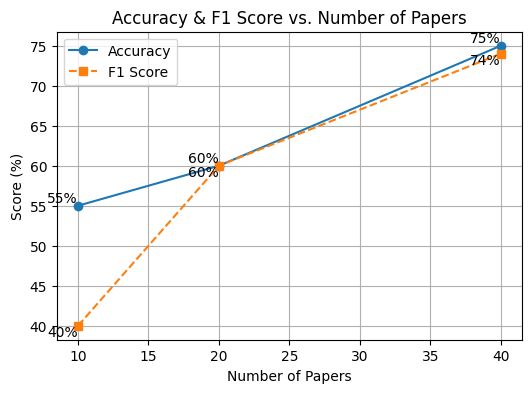

In [6]:
# Data points
papers = [10, 20, 40]
accuracy = [55, 60, 75]
f1_score = [40, 60, 74]

# Create plot
plt.figure(figsize=(6, 4))
plt.plot(papers, accuracy, marker='o', linestyle='-', label="Accuracy")
plt.plot(papers, f1_score, marker='s', linestyle='--', label="F1 Score")

# Labels and title
plt.xlabel("Number of Papers")
plt.ylabel("Score (%)")
plt.title("Accuracy & F1 Score vs. Number of Papers")
plt.legend()  # Show legend
plt.grid(True)  # Enable grid

# Annotate points with values
for x, y in zip(papers, accuracy):
    plt.text(x, y, f"{y}%", ha='right', va='bottom')

for x, y in zip(papers, f1_score):
    plt.text(x, y, f"{y}%", ha='right', va='top')

# Show plot
plt.show()
